In [21]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

In [36]:
normalized_counts = pd.read_csv("normalized_counts.csv", dtype={"Total Population":np.int32, "total_norm":np.float64,
                                                               "total_count":np.int32})
del normalized_counts["Unnamed: 0"]
normalized_counts.drop(8, inplace=True)
normalized_counts.head()

,State,Total Population,State Abbr,black,jews,muslim,norm_black,norm_jewish,norm_muslim,total_count,total_norm
0,Alabama,4863300,AL,1.0,1.0,4.0,0.000021,0.000021,0.000082,6,0.000123
1,Alaska,741894,AK,1.0,0.0,1.0,0.000135,0.000000,0.000135,2,0.000270
2,Arizona,6931071,AZ,1.0,0.0,4.0,0.000014,0.000000,0.000058,5,0.000072
3,Arkansas,2988248,AR,3.0,1.0,3.0,0.000100,0.000033,0.000100,7,0.000234
4,California,39250017,CA,30.0,31.0,17.0,0.000076,0.000079,0.000043,78,0.000199


In [37]:
norm_mean = normalized_counts['total_norm'].mean()
norm_mean

0.00018901990647451276

In [38]:
total_pop = normalized_counts['Total Population'].sum()
total_pop

314640326

In [39]:
normalized_counts["Normalized Population"] = ""
normalized_counts.head()

,State,Total Population,State Abbr,black,jews,muslim,norm_black,norm_jewish,norm_muslim,total_count,total_norm,Normalized Population
0,Alabama,4863300,AL,1.0,1.0,4.0,0.000021,0.000021,0.000082,6,0.000123,
1,Alaska,741894,AK,1.0,0.0,1.0,0.000135,0.000000,0.000135,2,0.000270,
2,Arizona,6931071,AZ,1.0,0.0,4.0,0.000014,0.000000,0.000058,5,0.000072,
3,Arkansas,2988248,AR,3.0,1.0,3.0,0.000100,0.000033,0.000100,7,0.000234,
4,California,39250017,CA,30.0,31.0,17.0,0.000076,0.000079,0.000043,78,0.000199,


In [40]:
for index,row in normalized_counts.iterrows():
    norm_pop = row['Total Population'] / total_pop
    
    normalized_counts.set_value(index, 'Normalized Population', norm_pop)

In [41]:
normalized_counts.head()

,State,Total Population,State Abbr,black,jews,muslim,norm_black,norm_jewish,norm_muslim,total_count,total_norm,Normalized Population
0,Alabama,4863300,AL,1.0,1.0,4.0,0.000021,0.000021,0.000082,6,0.000123,0.0154567
1,Alaska,741894,AK,1.0,0.0,1.0,0.000135,0.000000,0.000135,2,0.000270,0.00235791
2,Arizona,6931071,AZ,1.0,0.0,4.0,0.000014,0.000000,0.000058,5,0.000072,0.0220286
3,Arkansas,2988248,AR,3.0,1.0,3.0,0.000100,0.000033,0.000100,7,0.000234,0.00949735
4,California,39250017,CA,30.0,31.0,17.0,0.000076,0.000079,0.000043,78,0.000199,0.124746


In [42]:
total_tweets = int(normalized_counts['total_count'].sum())
pop = []
for x in range(total_tweets):
    pop.append(1)
    
for x in range(total_pop - total_tweets):
    pop.append(0)

In [43]:
result = stats.ttest_1samp(a=alabama, popmean=np.mean(pop))

In [44]:
normalized_counts['P-Value'] = ""
normalized_counts.head()

,State,Total Population,State Abbr,black,jews,muslim,norm_black,norm_jewish,norm_muslim,total_count,total_norm,Normalized Population,P-Value
0,Alabama,4863300,AL,1.0,1.0,4.0,0.000021,0.000021,0.000082,6,0.000123,0.0154567,
1,Alaska,741894,AK,1.0,0.0,1.0,0.000135,0.000000,0.000135,2,0.000270,0.00235791,
2,Arizona,6931071,AZ,1.0,0.0,4.0,0.000014,0.000000,0.000058,5,0.000072,0.0220286,
3,Arkansas,2988248,AR,3.0,1.0,3.0,0.000100,0.000033,0.000100,7,0.000234,0.00949735,
4,California,39250017,CA,30.0,31.0,17.0,0.000076,0.000079,0.000043,78,0.000199,0.124746,


In [45]:
for index,row in normalized_counts.iterrows():
    data = []
    num_1 = row['total_count']
    for x in range(num_1):
        data.append(1)
        
    state_pop = row['Total Population']
    num_2 = state_pop - num_1
    for x in range(num_2):
        data.append(0)
        
    result = stats.ttest_1samp(a=data, popmean=np.mean(pop))
    
    normalized_counts.set_value(index, 'P-Value', result[1])

In [46]:


normalized_counts

,State,Total Population,State Abbr,black,jews,muslim,norm_black,norm_jewish,norm_muslim,total_count,total_norm,Normalized Population,P-Value
0,Alabama,4863300,AL,1.0,1.0,4.0,0.000021,0.000021,0.000082,6,0.000123,0.0154567,0.183419
1,Alaska,741894,AK,1.0,0.0,1.0,0.000135,0.000000,0.000135,2,0.000270,0.00235791,0.677773
2,Arizona,6931071,AZ,1.0,0.0,4.0,0.000014,0.000000,0.000058,5,0.000072,0.0220286,0.000247377
3,Arkansas,2988248,AR,3.0,1.0,3.0,0.000100,0.000033,0.000100,7,0.000234,0.00949735,0.620215
4,California,39250017,CA,30.0,31.0,17.0,0.000076,0.000079,0.000043,78,0.000199,0.124746,0.710573
5,Colorado,5540545,CO,4.0,0.0,3.0,0.000072,0.000000,0.000054,7,0.000126,0.0176091,0.17993
6,Connecticut,3576452,CT,2.0,2.0,1.0,0.000056,0.000056,0.000028,5,0.000140,0.0113668,0.418584
7,Delaware,952065,DE,3.0,1.0,0.0,0.000315,0.000105,0.000000,4,0.000420,0.00302588,0.274065
9,Florida,20612439,FL,19.0,13.0,14.0,0.000092,0.000063,0.000068,46,0.000223,0.0655111,0.318989
10,Georgia,10310371,GA,10.0,5.0,4.0,0.000097,0.000048,0.000039,19,0.000184,0.0327688,0.885355


In [47]:
normalized_counts.to_csv("norm_with_p_values.csv", index=False)

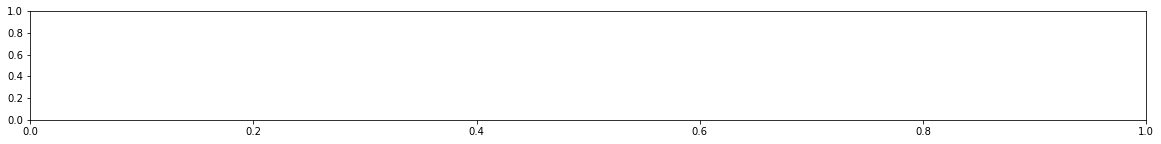

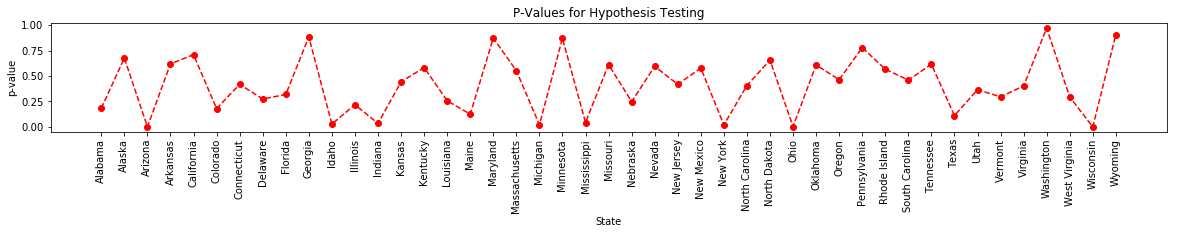

In [48]:
x_axis = np.arange(45)
y_axis = normalized_counts['P-Value']

plt.figure(figsize=(20,2))

plt.plot(x_axis, y_axis, "--o", color='r')

plt.title("P-Values for Hypothesis Testing")
plt.xlabel("State")
plt.ylabel("p-value")

x_labels = normalized_counts['State']
x_locations = [value for value in np.arange(45)]
plt.xticks(x_locations, x_labels, rotation=90)

plt.savefig("Images/p-value.png", bbox_inches='tight')

plt.show()

In [49]:
normalized_counts.loc[normalized_counts['P-Value'] < 0.05]

,State,Total Population,State Abbr,black,jews,muslim,norm_black,norm_jewish,norm_muslim,total_count,total_norm,Normalized Population,P-Value
2,Arizona,6931071,AZ,1.0,0.0,4.0,0.000014,0.000000,0.000058,5,0.000072,0.0220286,0.000247377
11,Idaho,1683140,ID,0.0,1.0,0.0,0.000000,0.000059,0.000000,1,0.000059,0.00534941,0.0275036
13,Indiana,6633053,IN,1.0,3.0,3.0,0.000015,0.000045,0.000045,7,0.000106,0.0210814,0.0334127
20,Michigan,9928300,MI,16.0,9.0,7.0,0.000161,0.000091,0.000071,32,0.000322,0.0315544,0.0205811
22,Mississippi,2988726,MS,5.0,1.0,7.0,0.000167,0.000033,0.000234,13,0.000435,0.00949887,0.0426131
28,New York,19745289,NY,20.0,22.0,13.0,0.000101,0.000111,0.000066,55,0.000279,0.0627551,0.0188986
31,Ohio,11614373,OH,4.0,4.0,4.0,0.000034,0.000034,0.000034,12,0.000103,0.0369132,0.0035139
44,Wisconsin,5778709,WI,2.0,1.0,0.0,0.000035,0.000017,0.000000,3,0.000052,0.0183661,3.84595e-06


In [50]:
normalized_counts.to_csv("norm_with_p_vales.csv", index=False)